## K Means Cluster Emissions

In [2]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import geopandas as gpd
import matplotlib.pylab as plt
import pylab as pl
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import statsmodels.api as sm
import sys
import os
import urllib
import requests
import json
import zipfile
import shapely
import io
from io import StringIO
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [3]:
#uses all NTA data
nta_data = pd.read_csv('all_nta.csv')

In [4]:
nta_data = nta_data.set_index('ntacode')

# All Emissions

In [5]:
all_emissions = nta_data.drop(columns=['child.asthma.rate.per.10K','adult.asthma.rate.per.10K'])

In [6]:
asthma = nta_data[['child.asthma.rate.per.10K']]

In [7]:
all_emissions_standard = (all_emissions - all_emissions.mean())/all_emissions.std()

In [8]:
all_emissions_standard.head()

,Boiler Emissions- Total NOx Emissions:Per km2,Boiler Emissions- Total PM2.5 Emissions:Per km2,Boiler Emissions- Total SO2 Emissions:Per km2,household_co2,Acenaphthene (HAP),Acenaphthylene (HAP),Acetaldehyde (HAP),Acetonitrile (HAP),Acrolein (HAP),Acrylonitrile (HAP),...,Trichloroethane (HAP),Trichloroethylene (HAP),Triethylamine (HAP),Trimethylpentane (HAP),Vinyl Acetate (HAP),Vinyl Chloride (HAP),Vinylidene Chloride (HAP),Volatile Organic Compounds (CAP),Xylene (HAP),Xylenes (Mixed Isomers) (HAP)
ntacode,,,,,,,,,,,,,,,,,,,,,
BK09,-0.227094,-0.48403,-0.476224,-0.861721,-0.157073,-0.117455,-0.081450,-0.072283,-0.079043,-0.086696,...,-0.115734,-0.099625,-0.071611,-0.119681,-0.073037,-0.108966,-0.075532,-0.016126,-0.074616,-0.135110
BK17,-0.367076,-0.48403,-0.471452,1.474746,0.414372,-0.117455,-0.081201,-0.072283,-0.078895,-0.086696,...,-0.115734,-0.099625,-0.071611,-0.119681,-0.073037,-0.108966,-0.075532,-0.041987,-0.074616,0.541835
BK19,-0.367076,-0.48403,-0.471452,-0.082788,-0.157292,-0.117455,-0.081476,-0.072283,-0.079048,-0.086696,...,-0.115734,-0.099625,-0.071611,-0.119681,-0.073037,-0.108966,-0.075532,-0.133318,-0.074616,-0.135081
BK21,-0.367076,-0.48403,-0.471452,-0.309048,-0.157730,-0.117455,-0.081478,-0.072283,-0.079049,-0.086696,...,-0.115734,-0.099625,-0.071611,-0.119681,-0.073037,-0.108966,-0.075532,-0.141457,-0.074616,-0.135213
BK23,-0.367076,-0.48403,-0.471452,-0.686702,-0.157730,-0.117455,-0.081478,-0.072283,-0.079049,-0.086696,...,-0.115734,-0.099625,-0.071611,-0.119681,-0.073037,-0.108966,-0.075532,-0.141457,-0.074616,-0.135213


In [9]:
all_emissions_standard = all_emissions_standard.fillna(0)

At 2 clusters, inertia is 18449.37289770844
At 3 clusters, inertia is 14305.11893327682
At 4 clusters, inertia is 11220.599848642176
At 5 clusters, inertia is 9025.268429205253
At 6 clusters, inertia is 7405.109197627222
At 7 clusters, inertia is 6313.542051942019
At 8 clusters, inertia is 5263.593554734901
At 9 clusters, inertia is 4368.3438053522
At 10 clusters, inertia is 3539.10399086966
At 11 clusters, inertia is 2725.23447271261


Text(0.5, 1.0, 'Figure 1: Inertia Plot for Clustering on Emissions')

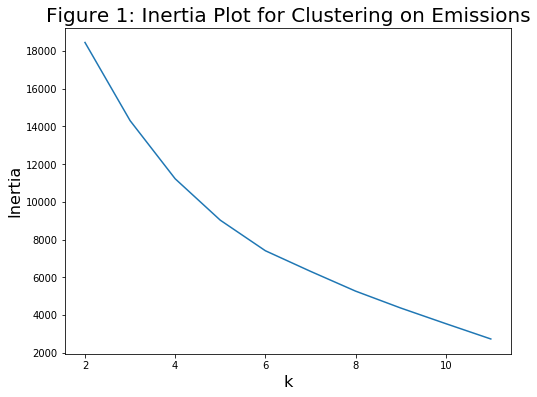

In [10]:
np.random.seed(999)
s = np.zeros(10)
for k in range(0, 10):
    est = KMeans(n_clusters = k+2, n_init = 100)
    est.fit(all_emissions_standard)
    s[k] = est.inertia_
    print('At {0} clusters, inertia is {1}'.format(k+2, s[k]))
    
plt.figure(figsize=(8, 6))
plt.plot(range(2, 12), s,'-')
plt.xlabel('k', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Figure 1: Inertia Plot for Clustering on Emissions', fontsize = 20)

In [11]:
km = KMeans(random_state=999,n_clusters=6, n_init=100)
res=km.fit(all_emissions_standard)
results = km.predict(all_emissions_standard)

In [12]:
all_emissions_standard['cluster'] = res.labels_

In [13]:
all_emissions_standard = all_emissions_standard.reset_index()

In [15]:
nta = gpd.GeoDataFrame.from_file('Neighborhood Tabulation Areas/geo_export_0f07cd7c-4789-446b-ba19-38bba9fdf894.shp')

In [17]:
nta.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904995,POLYGON ((-73.80379022888246 40.77561011179248...
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712318,"POLYGON ((-73.86109724335759 40.7636644770869,..."
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335574,POLYGON ((-73.75725671509139 40.71813860166257...
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.685413,POLYGON ((-73.94607828674226 40.82126321606191...


In [18]:
all_emissions_standard_geo = all_emissions_standard.merge(nta, left_on = 'ntacode', right_on = 'ntacode', how = 'outer')





In [19]:
all_emissions_standard_geo = gpd.GeoDataFrame(all_emissions_standard_geo)

Text(0.5, 1.0, 'Figure 2: NTA Clusters Based on all Chemical Emittance')

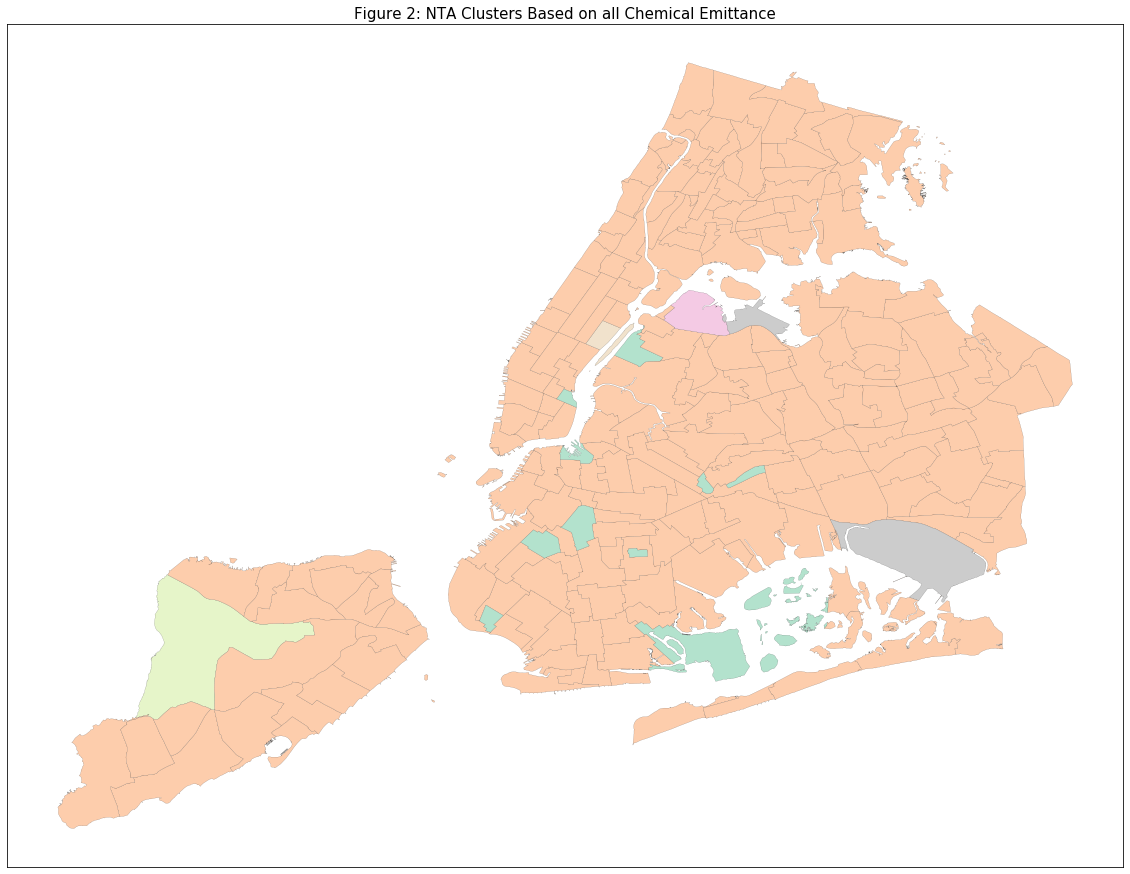

In [20]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
all_emissions_standard_geo.plot(column='cluster',cmap='Pastel2',alpha=1,edgecolor='black',
                  linewidth=0.1,ax=ax)
ax.set_title("Figure 2: NTA Clusters Based on all Chemical Emittance", fontsize = 15)

# Just the Important features from Rohun's Regression Feature Importance

In [21]:
just_nei_subset = nta_data[['Acenaphthene (HAP)', 'Acetaldehyde (HAP)', 'Acrylonitrile (HAP)',
                                     'Allyl Chloride (HAP)', 'Ammonia (CAP)', 'Antimony (HAP)',
                                     'Benz[a]Anthracene (HAP)', 'Benzo[a]Pyrene (HAP)', 'Beryllium (HAP)',
                                     'Biphenyl (HAP)',
                                     'Butyl Ether (HAP)', 'Cadmium (HAP)', 'Carbon Tetrachloride (HAP)',
                                     'Carbonyl Sulfide (HAP)', 'Chlorine (HAP)', 'Chlorobenzene (HAP)',
                                     'Chloroform (HAP)', 'Cumene (HAP)', 'Dibenzo[a,h]Anthracene (HAP)',
                                     'Dioxane (HAP)', 'Ethyl Benzene (HAP)', 'Ethylene Dichloride (HAP)',
                                     'Ethylene Oxide (HAP)', 'Fluoranthene (HAP)', 'Methyl Chloride (HAP)',
                                     'Methylene Chloride (HAP)', 'PAH, total (HAP)', 'Propylene Oxide (HAP)',
                                     'Tetrachloroethane (HAP)', 'Tetrachloroethylene (HAP)',
                                     'Trimethylpentane (HAP)']]

In [22]:
subset_emissions_standard = (just_nei_subset - just_nei_subset.mean())/just_nei_subset.std()

At 2 clusters, inertia is 4963.065671140659
At 3 clusters, inertia is 4229.708954197796
At 4 clusters, inertia is 3528.400537788761
At 5 clusters, inertia is 3078.6081481356473
At 6 clusters, inertia is 2720.8972699942483
At 7 clusters, inertia is 2342.883378850468
At 8 clusters, inertia is 2027.9238057243988
At 9 clusters, inertia is 1687.7935790824963
At 10 clusters, inertia is 1444.0562982132428
At 11 clusters, inertia is 1249.1422218701646


Text(0.5, 1.0, 'Inertia Plot')

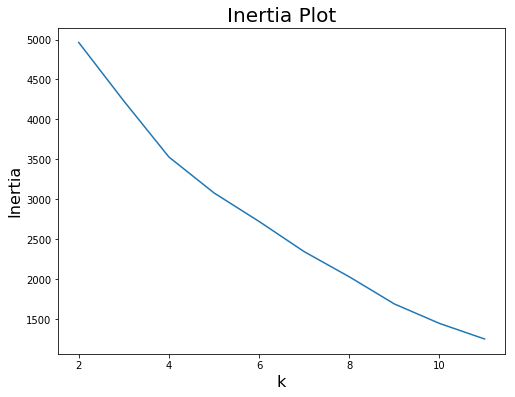

In [23]:
np.random.seed(999)
s = np.zeros(10)
for k in range(0, 10):
    est = KMeans(n_clusters = k+2, n_init = 100)
    est.fit(subset_emissions_standard)
    s[k] = est.inertia_
    print('At {0} clusters, inertia is {1}'.format(k+2, s[k]))
    
plt.figure(figsize=(8, 6))
plt.plot(range(2, 12), s,'-')
plt.xlabel('k', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Inertia Plot', fontsize = 20)

In [24]:
km = KMeans(random_state=999,n_clusters=4, n_init=100)
res=km.fit(subset_emissions_standard)
results = km.predict(subset_emissions_standard)

In [25]:
subset_emissions_standard['cluster'] = res.labels_

In [26]:
subset_emissions_standard = subset_emissions_standard.reset_index()

In [28]:
subset_emissions_standard = subset_emissions_standard.merge(nta, left_on = 'ntacode', right_on = 'ntacode', how = 'outer')

In [29]:
subset_emissions_standard = gpd.GeoDataFrame(subset_emissions_standard)

Text(0.5, 1.0, 'Figure 3: NTA Clusters Based on Reported Child Asthma')

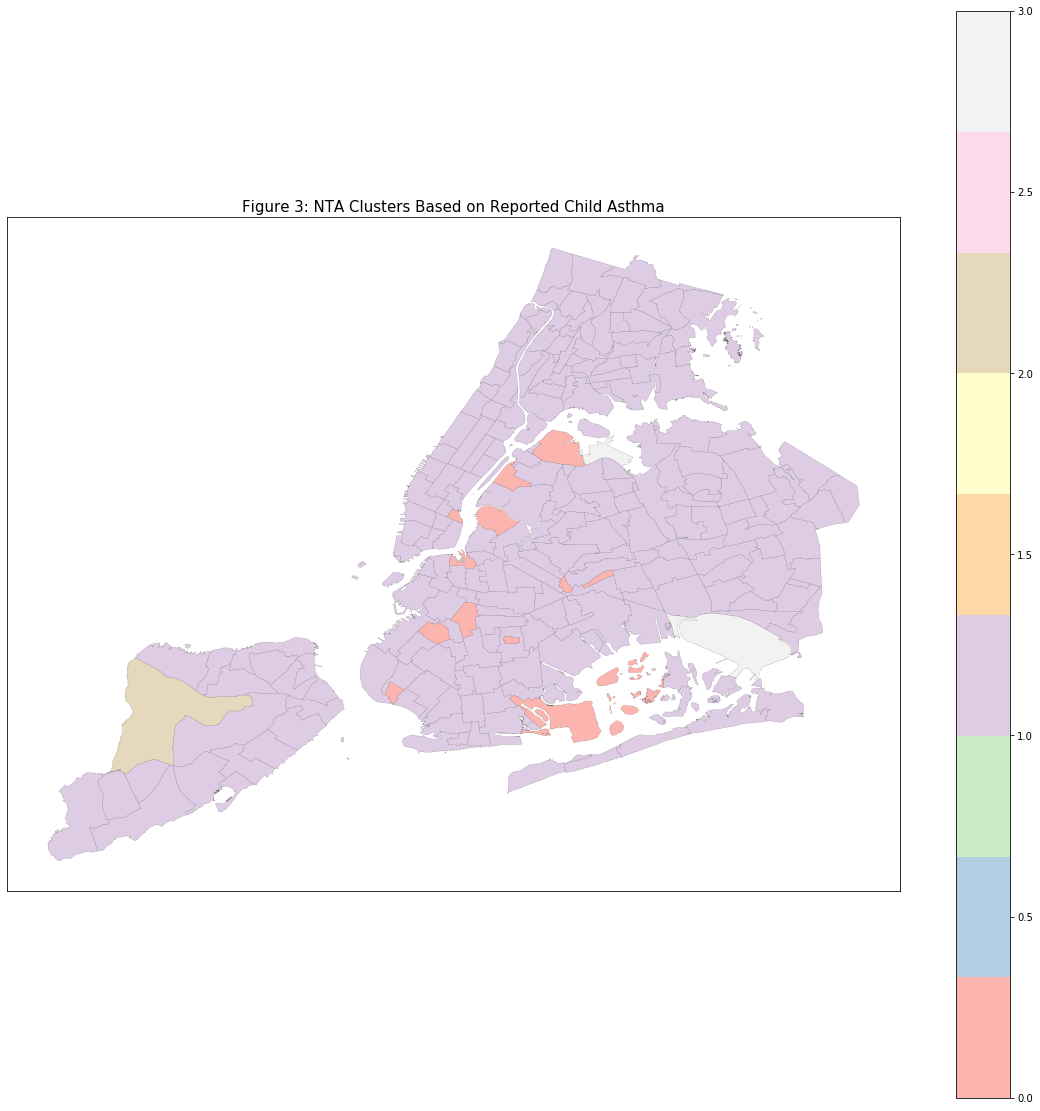

In [30]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
subset_emissions_standard.plot(column='cluster',cmap='Pastel1',alpha=1,edgecolor='black',
                  linewidth=0.1,ax=ax, legend=True)
ax.set_title("Figure 3: NTA Clusters Based on Reported Child Asthma", fontsize = 15)

# Asthma

In [46]:
asthma = nta_data[['child.asthma.rate.per.10K']]

In [47]:
norm_asthma = asthma#(asthma - asthma.mean())/asthma.std()

At 2 clusters, inertia is 23356.046837402464
At 3 clusters, inertia is 10795.382565940603
At 4 clusters, inertia is 6222.025742857142
At 5 clusters, inertia is 3516.5533019342524
At 6 clusters, inertia is 2567.405767271439
At 7 clusters, inertia is 1942.0568467363432
At 8 clusters, inertia is 1525.6277808022774
At 9 clusters, inertia is 1185.9674754494822
At 10 clusters, inertia is 893.8351475291691
At 11 clusters, inertia is 735.8041290868271


Text(0.5, 1.0, 'Figure 9: Inertia Plot for Clustering on Asthma Cases per 10,000 People')

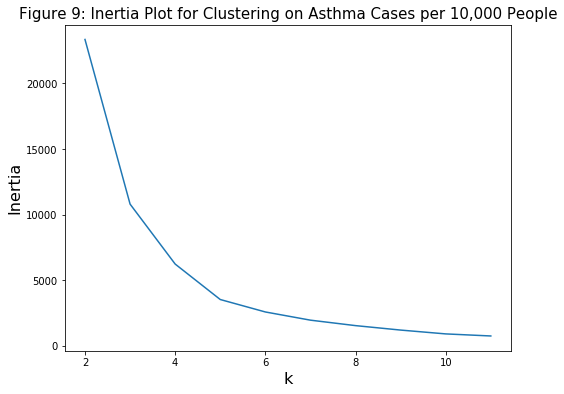

In [48]:
np.random.seed(999)
s = np.zeros(10)
for k in range(0, 10):
    est = KMeans(n_clusters = k+2, n_init = 100)
    est.fit(norm_asthma)
    s[k] = est.inertia_
    print('At {0} clusters, inertia is {1}'.format(k+2, s[k]))
    
plt.figure(figsize=(8, 6))
plt.plot(range(2, 12), s,'-')
plt.xlabel('k', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Figure 9: Inertia Plot for Clustering on Asthma Cases per 10,000 People', fontsize = 15)

In [49]:
km = KMeans(random_state=999,n_clusters=3, n_init=100)
res=km.fit(norm_asthma)
results = km.predict(norm_asthma)

In [50]:
norm_asthma['cluster'] = res.labels_

/Users/rohun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
norm_asthma = norm_asthma.reset_index()

In [52]:
asthma_geo_kmean = norm_asthma.merge(nta, left_on = 'ntacode', right_on = 'ntacode', how = 'outer')

In [53]:
asthma_geo_kmean = gpd.GeoDataFrame(asthma_geo_kmean)

Text(0.5, 1.0, 'Figure 10: NTA Clusters Based on Reported Child Asthma')

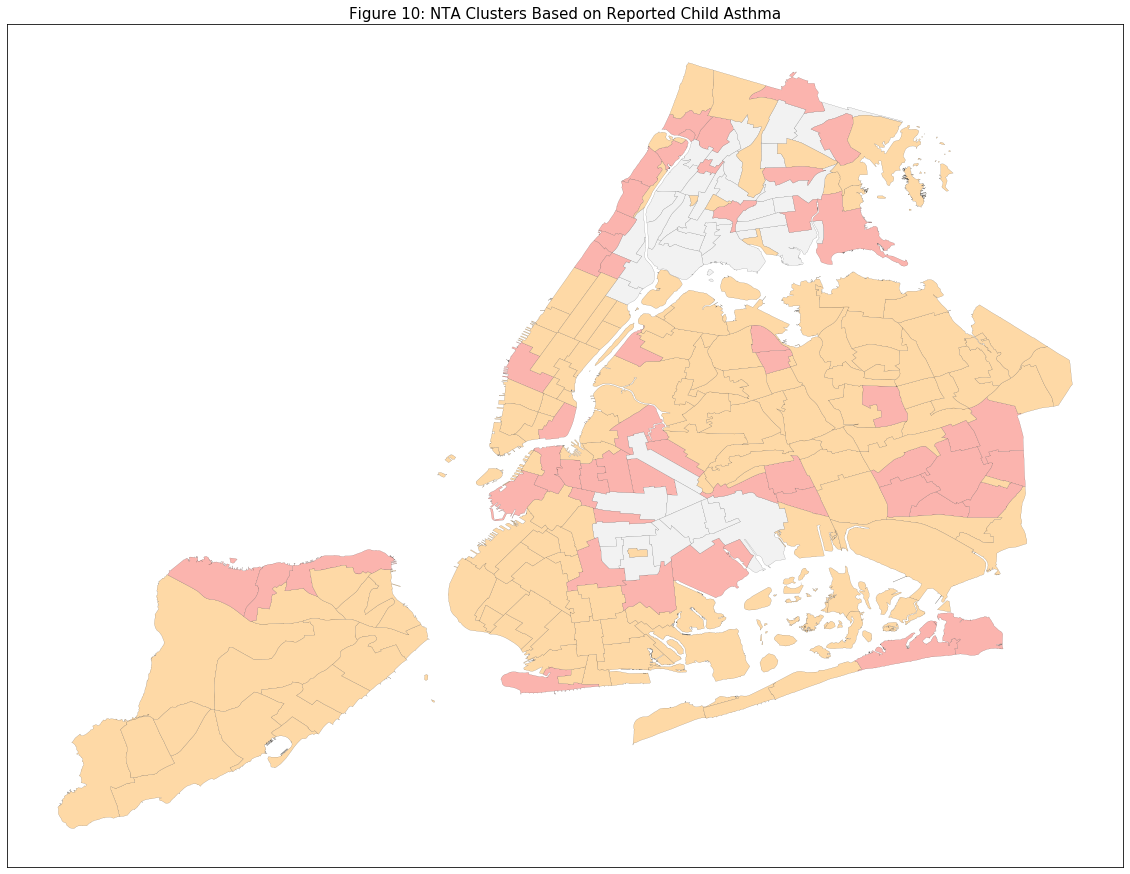

In [54]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
asthma_geo_kmean.plot(column='cluster',cmap='Pastel1',alpha=1,edgecolor='black',
                  linewidth=0.1,ax=ax)
ax.set_title("Figure 10: NTA Clusters Based on Reported Child Asthma", fontsize = 15)

In [55]:
asthma_geo_kmean.head(10)

,ntacode,child.asthma.rate.per.10K,cluster,boro_code,boro_name,county_fip,ntaname,shape_area,shape_leng,geometry
0,BK09,6.1,1,3.0,Brooklyn,047,Brooklyn Heights-Cobble Hill,9.983626e+06,14264.785618,POLYGON ((-73.99236367043248 40.68969012377697...
1,BK17,8.9,1,3.0,Brooklyn,047,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,6.334150e+07,91051.033731,POLYGON ((-73.91809256480836 40.58657033500474...
2,BK19,8.0,1,3.0,Brooklyn,047,Brighton Beach,1.718014e+07,21060.169664,"POLYGON ((-73.96034953585209 40.5873062860739,..."
3,BK21,30.1,0,3.0,Brooklyn,047,Seagate-Coney Island,3.878203e+07,51874.955526,POLYGON ((-73.97459000582609 40.58313882126141...
4,BK23,0.0,1,3.0,Brooklyn,047,West Brighton,8.738769e+06,14113.581367,POLYGON ((-73.96888995877943 40.57526123899412...
5,BK25,2.5,1,3.0,Brooklyn,047,Homecrest,2.999197e+07,27514.022916,POLYGON ((-73.95859278495766 40.61040303093505...
6,BK26,13.9,1,3.0,Brooklyn,047,Gravesend,3.134195e+07,39922.674377,POLYGON ((-73.96514385192494 40.59110191611805...
7,BK27,4.8,1,3.0,Brooklyn,047,Bath Beach,2.053462e+07,22383.743245,POLYGON ((-74.00200394677509 40.59413237177824...
8,BK28,4.9,1,3.0,Brooklyn,047,Bensonhurst West,4.667057e+07,37137.439170,POLYGON ((-73.97963821772845 40.61556454722805...
9,BK29,3.5,1,3.0,Brooklyn,047,Bensonhurst East,3.577795e+07,33903.245445,POLYGON ((-73.97477657974535 40.61263847492685...


In [56]:
asthma_geo_kmean.groupby(['cluster']).agg({'child.asthma.rate.per.10K': 'mean'})

,child.asthma.rate.per.10K
cluster,
0,31.239623
1,8.810476
2,61.329730
